In [22]:
# Load some supporting packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set_context('notebook')
from tqdm import tqdm

In [23]:
!wget https://github.com/AllenCellModeling/AllenCellModeling.github.io/raw/master/assets/data/20170919_cell_segmentations.npz
!wget https://github.com/AllenCellModeling/AllenCellModeling.github.io/raw/master/assets/data/20170919_nuclear_segmentations.npz

cells = np.load("20170919_cell_segmentations.npz")
nucs = np.load("20170919_nuclear_segmentations.npz")
names = cells.keys()
print("We found %i cell segmentations"%len(names))

--2020-04-29 15:32:50--  https://github.com/AllenCellModeling/AllenCellModeling.github.io/raw/master/assets/data/20170919_cell_segmentations.npz
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/AllenCellModeling/AllenCellModeling.github.io/master/assets/data/20170919_cell_segmentations.npz [following]
--2020-04-29 15:32:50--  https://media.githubusercontent.com/media/AllenCellModeling/AllenCellModeling.github.io/master/assets/data/20170919_cell_segmentations.npz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.196.133
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.196.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73629496 (70M) [application/octet-stream]
Saving to: ‘20170919_cell_segmentations.npz.1’

20170919_cell_seg

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure

def plot_volume(volume, ax, zoom=8):
    """Find the mesh for a segmentation and plot it as a surface"""
    verts, faces, normals, values = measure.marching_cubes_lewiner(volume)
    x, y, z = verts.T
    ax.plot_trisurf(x, y, faces, z, lw=0, cmap=plt.cm.Paired)
    ax.set_axis_off()  # look nice with no axes 
    ax.dist = zoom     # how far from axis we want to be
    #ax.set(aspect=1, facecolor="white")

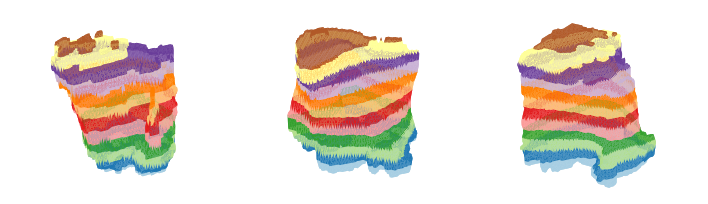

In [35]:
# Now plot our cells
names = list(names)
sample_cells = [cells[name] for name in names[:3]]
fig, axes = plt.subplots(1, 3, figsize=(10,3), subplot_kw={"projection" : "3d"})
for ax, cell in zip(axes, sample_cells):
    plot_volume(cell, ax)
plt.tight_layout()

In [ ]:
from sklearn.decomposition import IncrementalPCA

cell_ipca = IncrementalPCA(n_components=20)
nuc_ipca = IncrementalPCA(n_components=20)

for batch_names in tqdm(np.array_split(names, 100)):
    cell_batch = np.vstack([cells[n].flatten() for n in batch_names])
    nucs_batch = np.vstack([nucs[n].flatten() for n in batch_names])
    cell_ipca.partial_fit(cell_batch)
    nuc_ipca.partial_fit(nucs_batch)

 33%|███▎      | 33/100 [50:50<1:45:41, 94.65s/it]